In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import rcParams
import pandas as pd
import warnings

from ipywidgets import widgets
from IPython.html.widgets import *

warnings.filterwarnings('ignore')
rcParams.update({'font.size': 15})
#plt.style.use('ggplot')
#plt.style.use('seaborn-dark-palette')
plt.style.use('fivethirtyeight')

float_formatter = lambda x: "%.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
np.set_printoptions(precision=2)

In [7]:
TASKS = 4
USERS = 201

# Load free exploration
#user(0), cat-task complexity(1), # task selec(2), % sele(3), # correct on task(4), % correct(5), answers(6:11)
fpilot = np.loadtxt('fpilot.txt')

# Load strategic learning
#user(0), cat-task complexity(1), # task selec(2), % sele(3), # correct on task(4), % correct(5), answers(6:11)
spilotTe = np.loadtxt('strategic-test.txt')
spilotTr = np.loadtxt('strategic-train.txt')
spilotFr = np.loadtxt('strategic-free.txt')
# print(spilotTe.shape)
# print(spilotTr.shape)
# print(spilotFr.shape)

# Integrate all significant metrics
# to make things easier take free exploration data and subjective answers first, then stack performance from 
# the other two phases

# Just for verification purposes
if spilotFr.shape[0] == spilotTr.shape[0] and spilotFr.shape[0] == spilotTe.shape[0]:
    #print(spilotFr[:,5:7], spilotTr[:,5:7], spilotTe[:,5:7])
    spilot = np.hstack((spilotFr, spilotTr[:,7:], spilotTr[:,5:7], spilotTe[:,5:7]))
    #print(spilot)
    #print(spilot.shape)
    #print(spilot)
else:
    print('columns do not match, someone did not select all tasks')
    
# In the second pilot 
# id(0), cat-task complexity(1), # task selec(2), % sele(3), # correct on task(4), % correct(5)
# int(6), complex(7), time(8), prog(9), rule(10), learn(11), trCorrect(12), tr%Correct(13), 
# teCorrect(14), te%Correct(15)

# For the second pilot the fields rule-Mons(10),learning-Mons(11) are inverted
# and rule is not the same kind of field as rule in the first pilot
# switch columns in first pilot to make easier to handle
fpilot[:,[10, 11]] = fpilot[:,[11, 10]]
# Also if we want to use them together assign them new ids +USERS

# Categories are: [b'category1D', b'category2D', b'categoryIgnore1D', b'categoryRandom']
# Learn? are: [b'gradual', b'insight', b'none', b'unsure']
# rule? are: [b'no-rule', b'unsure', b'yes-rule']

In [8]:
#user(0), cond(1) cat-task complexity(2), # task selec(3), % sele(4), # correct on task(5), % correct(6), 
#answers(7:12)

# Split by users that received information about the existence of a random task and those that didn't
informed = spilot[spilot[:,1]==0]
uninformed = spilot[spilot[:,1]==1]
#print(spilot[-1,:])
# Remove column 
spilot = np.delete(spilot, 1, axis=1)
informed = np.delete(informed, 1, axis=1)
uninformed = np.delete(uninformed, 1, axis=1)

print(np.shape(spilotFr), np.shape(spilotTr), np.shape(spilotTe))
print(np.shape(informed), np.shape(uninformed))

# print(spilot[-1,:])
# print(spilotTr[-1,:])
# print(spilotTe[-1,:])
# print(spilotFr[-1,:])

(804, 7) (804, 13) (804, 13)
(400, 16) (404, 16)


In [9]:
print(fpilot.shape, spilot.shape)
import itertools
import matplotlib.cm as cm

catLab = ['1D', 'I1D', '2D', 'R']
learnLab = ['gradual', 'insight', 'none', 'unsure']
ruleLab = ['no', 'unsure', 'yes']

def plotAgainstTask(arr, titles, offset, experimentNumber):
    
    # create an array of colors based on arr[:,0] so r,r,r,r,b,b,b,b,...
    if experimentNumber < 3:
        co = ["r", "b", "g", "k", "y"]
    else:
        co = cm.viridis(np.linspace(0, 1, USERS))
    colors = [co[uid] for uid in arr[:,0].astype(int)]
    for i in range(len(titles)):
        #fig = plt.figure(figsize=(5, 5))
        fig, ax = plt.subplots(figsize=(5, 5))
        
        # Control tick frequency
        plt.xticks(np.arange(min(arr[:,1]), max(arr[:,1])+1, 1.0))
        # Rename ticks
        ax.set_xticklabels(catLab)
        
        #colors = iter(cm.rainbow(np.linspace(0, 1, len(ys))))
        #colors = itertools.cycle(["r", "b", "g", "k"])
        #plt.scatter(arr[:,1], arr[:,offset+i], c=next(colors), s=80, alpha=0.5)
        
        #colors = [co < 5 for co in arr[:,offset+i]]
        #colors = np.random.rand(arr.shape[0])
        
        # Set y axis range and labels
        if titles[i] == 'Rule' and experimentNumber == 1:
            plt.yticks(np.arange(min(arr[:,offset+i]), max(arr[:,offset+i])+1, 1.0))
            ax.set_yticklabels(ruleLab)
            ax.set_ylim([-0.25, max(arr[:,offset+i])+0.25])
        elif titles[i] == 'Type of Learning' and experimentNumber != 3:
            plt.yticks(np.arange(min(arr[:,offset+i]), max(arr[:,offset+i])+1, 1.0))
            ax.set_yticklabels(learnLab)
            ax.set_ylim([-0.25, max(arr[:,offset+i])+0.25])
        else:
            ax.set_ylim([-0.5,10.5])
        
        
        plt.scatter(arr[:,1], arr[:,offset+i], c=colors, s=80, alpha=0.5)
        
        #Get means and std
        means = [np.mean(arr[arr[:,1] == k,offset+i]) for k in range(TASKS)]
        std = [np.std(arr[arr[:,1] == k,offset+i]) for k in range(TASKS)]
        plt.plot(means, 'k--', alpha=0.5)
        plt.plot(np.asarray(means)+np.asarray(std), 'k--', alpha=0.05)
        plt.plot(np.asarray(means)-np.asarray(std), 'k--', alpha=0.05)
        
        #plt.plot(arr[:,1], arr[:,offset+i], '*')#, color=color[u], alpha=0.5)
        plt.ylabel(titles[i])
        plt.xlabel('Tasks')
        plt.show()


(20, 12) (804, 16)


## Informed

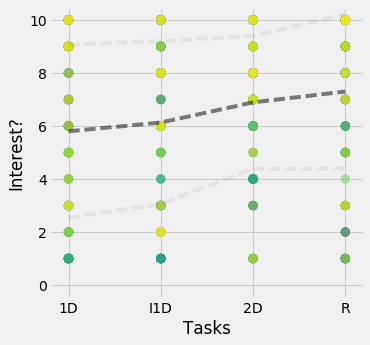

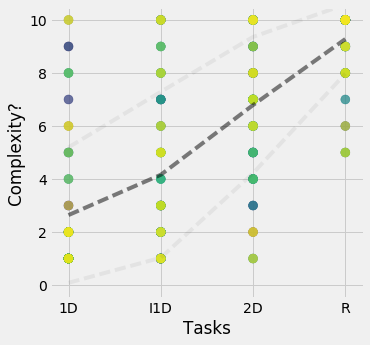

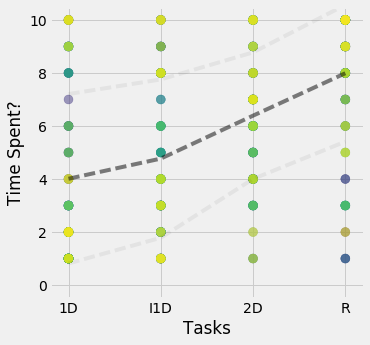

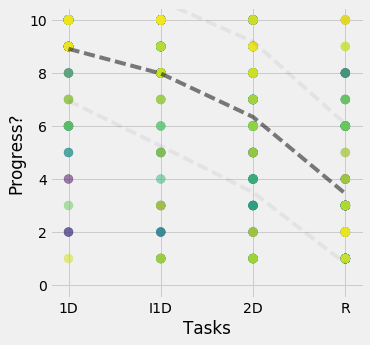

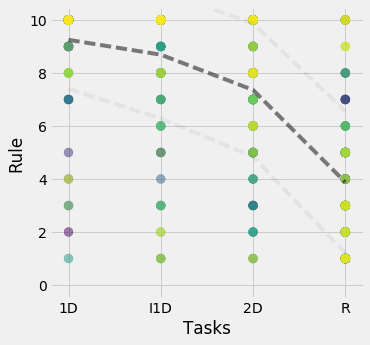

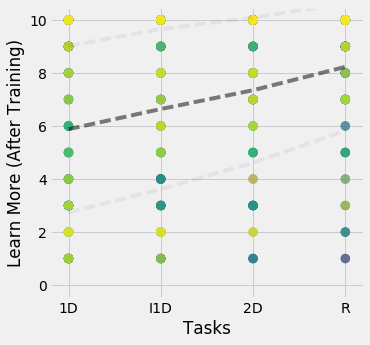

In [10]:
ytitles = ['Interest?', 'Complexity?', 'Time Spent?', 'Progress?', 'Rule', 'Learn More (After Training)']
plotAgainstTask(informed, ytitles, 6, 3)

## Uninformed

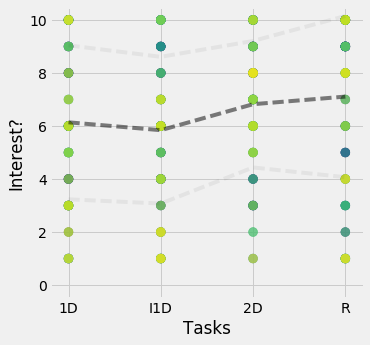

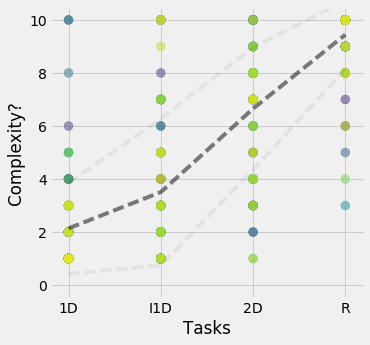

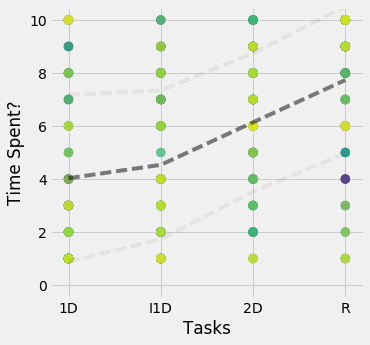

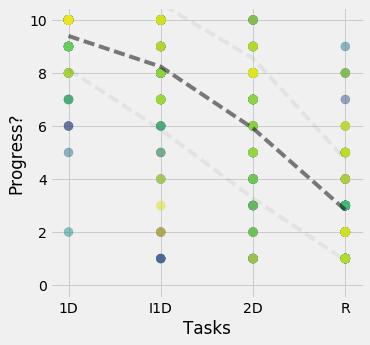

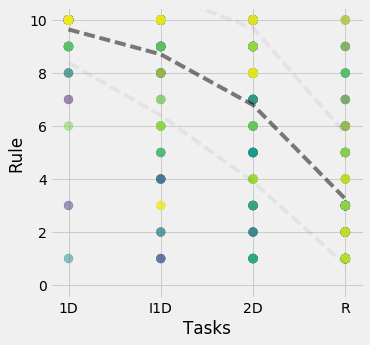

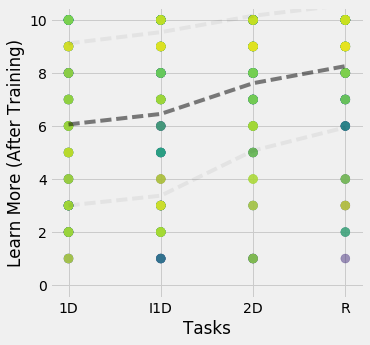

In [11]:
plotAgainstTask(uninformed, ytitles, 6, 3)

## All subjects

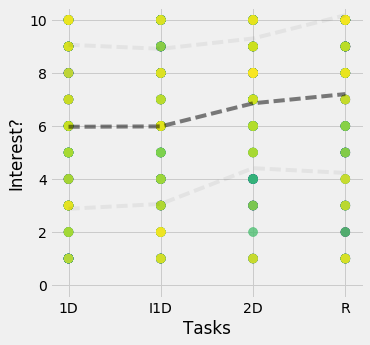

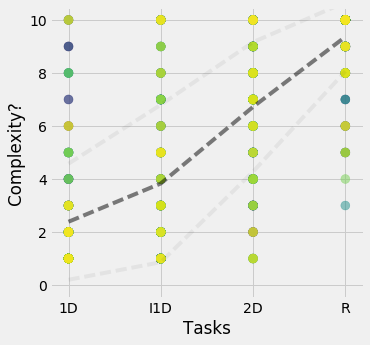

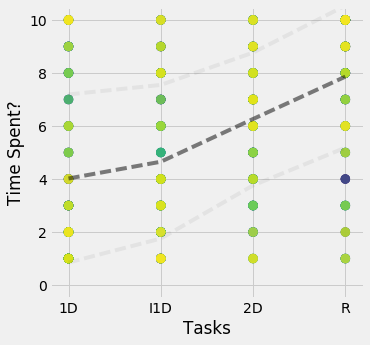

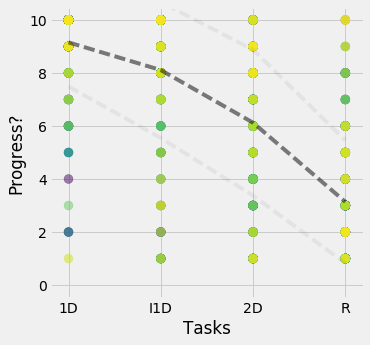

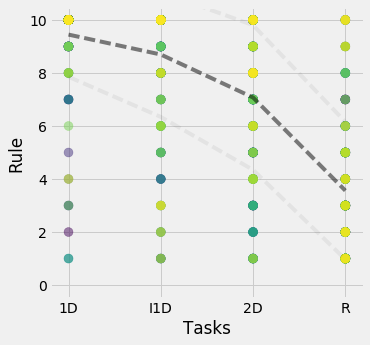

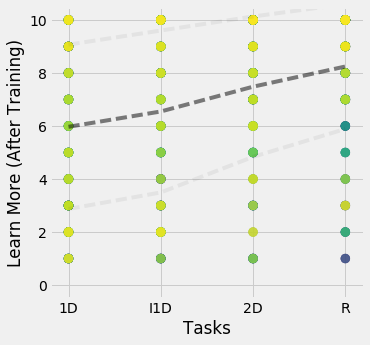

In [12]:

plotAgainstTask(spilot, ytitles, 6, 3)

In [13]:
# In the second pilot 
# id(0), cat-task complexity(1), # task selec(2), % sele(3), # correct on task(4), % correct(5)
# int(6), complex(7), time(8), prog(9), rule(10), learn(11), trCorrect(12), tr%Correct(13), 
# teCorrect(14), te%Correct(15)
def plotCombined(array1, array2, axisx, axisy, phasePilot2='exploration'):
    arr1 = array1.copy()
    arr2 = array2.copy()
    #axes = [uid, tkCplx, tkNSel, tkPSel, tkNCorr, tkPCorr, intst, cplx, tim, progr, rule, learn]
    dict = {'tkCplx': [1,'Task'], 
            'tkNSel': [2,'Times Selected'], 
            'tkPSel': [3,'Selected (Proportion)'],
            'tkNCorr': [4,'Times Correct'],
            'tkPCorr': [5,'Correct (Proportion)'],
            'interest': [6,'Interest'],
            'complex': [7,'Complexity'],
            'time': [8,'Time invested'],
            'progress': [9,'Progress'],
            'rule': [10,'Rule'],
            'learn': [11,'Type of Learning']
           }
    xaxis, yaxis = dict[axisx][0], dict[axisy][0]
    
    if phasePilot2 == 'training':
        arr2[:,[4, 5]] = arr2[:,[12, 13]]
    elif phasePilot2 == 'testing':
        arr2[:,[4, 5]] = arr2[:,[14, 15]]
    
    fig, ax = plt.subplots(figsize=(5, 5))

    plt.scatter(arr1[:,xaxis], arr1[:,yaxis], c='r', s=80, alpha=0.5)
    plt.scatter(arr2[:,xaxis], arr2[:,yaxis], c='b', s=80, alpha=0.5)
    
    # Fit a polynomial
    m, b = np.polyfit(arr1[:,xaxis], arr1[:,yaxis], 1)
    x = np.linspace(ax.get_xlim()[0],ax.get_xlim()[1],100)
    plt.plot(x, m*x + b, 'r-', label='1st P Free Exp')
    m, b = np.polyfit(arr2[:,xaxis], arr2[:,yaxis], 1)
    x = np.linspace(ax.get_xlim()[0],ax.get_xlim()[1],100)
    plt.plot(x, m*x + b, 'b-', label=''.join(['Stra (',phasePilot2,')']))
    
    plt.xlabel(dict[axisx][1])
    plt.ylabel(dict[axisy][1])
    
    plt.legend()
    plt.show()

In [14]:
spilot[1]

array([   0.  ,    1.  ,  125.  ,    0.5 ,  116.  ,    0.93,    7.  ,
          3.  ,    9.  ,   10.  ,   10.  ,    4.  ,   14.  ,    0.93,
         13.  ,    0.87])

## Relation with respect to reported interest

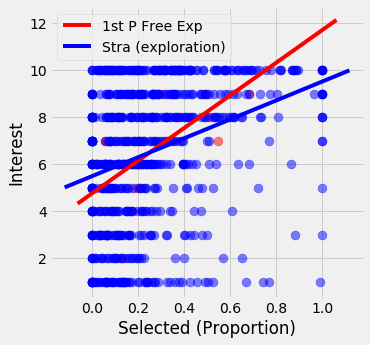

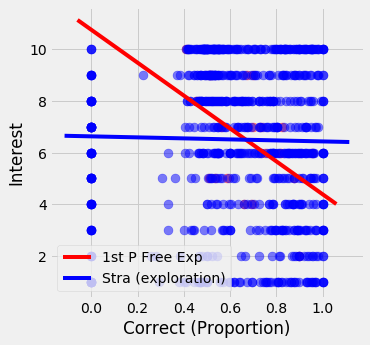

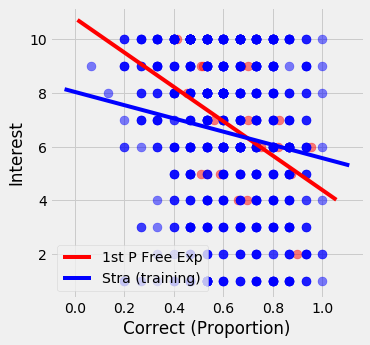

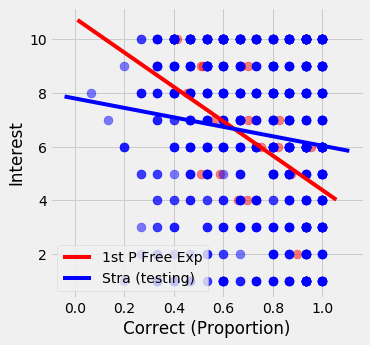

In [15]:
#%chosen and rep interest
plotCombined(fpilot,spilot,'tkPSel','interest','exploration')
plotCombined(fpilot,spilot,'tkPCorr','interest','exploration')
plotCombined(fpilot,spilot,'tkPCorr','interest','training')
plotCombined(fpilot,spilot,'tkPCorr','interest','testing')
#print(fpilot[:,3],spilotFr[:,3])

## Relation between accuracy and selection

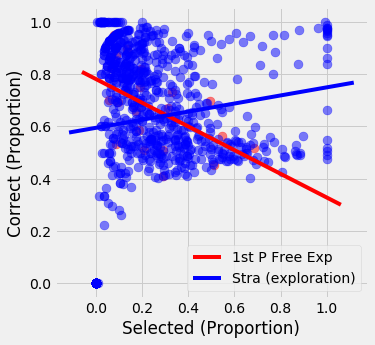

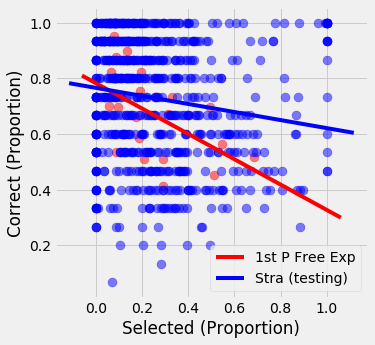

In [16]:
#axes = [uid, tkCplx, tkNSel, tkPSel, tkNCorr, tkPCorr, intst, cplx, tim, progr, rule, learn]
# %correct and %chosen
plotCombined(fpilot,spilot,'tkPSel','tkPCorr','exploration')
plotCombined(fpilot,spilot,'tkPSel','tkPCorr','testing')

## Relation with respect to reported complexity

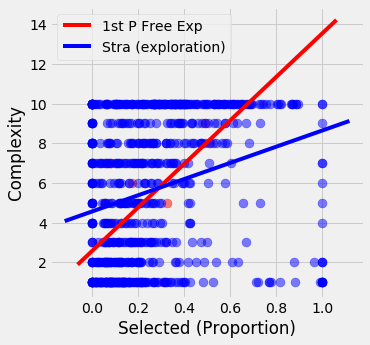

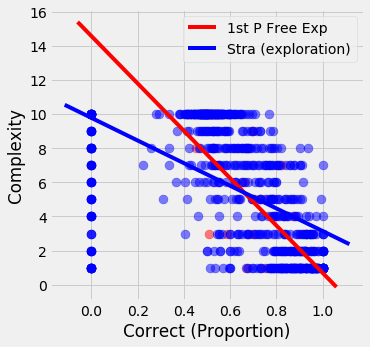

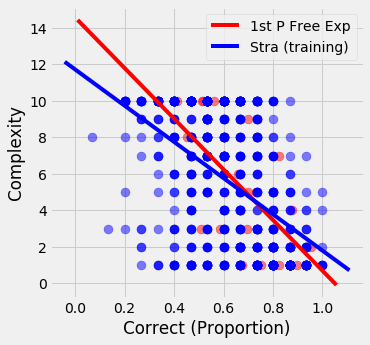

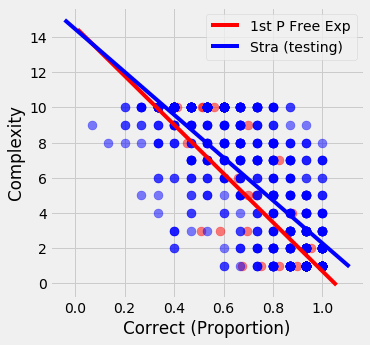

In [17]:
#axes = [uid, tkCplx, tkNSel, tkPSel, tkNCorr, tkPCorr, interest, complex, time, progress, rule, learn]
# %correct and %chosen
plotCombined(fpilot,spilot,'tkPSel','complex','exploration')
plotCombined(fpilot,spilot,'tkPCorr','complex','exploration')
plotCombined(fpilot,spilot,'tkPCorr','complex','training')
plotCombined(fpilot,spilot,'tkPCorr','complex','testing')

## Relation with respect to reported progress

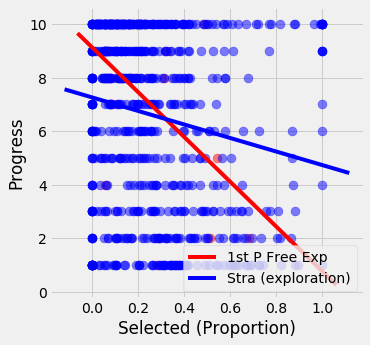

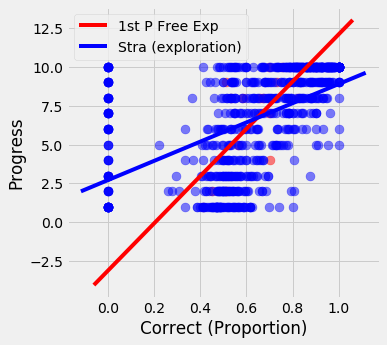

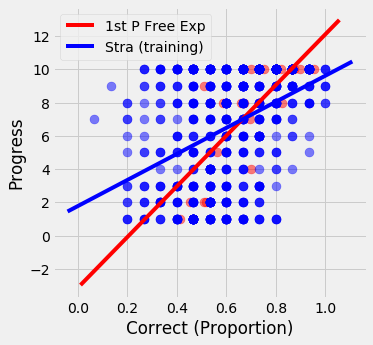

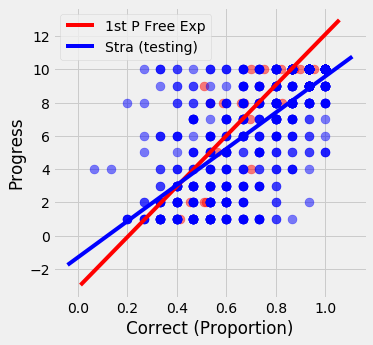

In [18]:
#axes = [uid, tkCplx, tkNSel, tkPSel, tkNCorr, tkPCorr, interest, complex, time, progress, rule, learn]
# %correct and %chosen
plotCombined(fpilot,spilot,'tkPSel','progress','exploration')
plotCombined(fpilot,spilot,'tkPCorr','progress','exploration')
plotCombined(fpilot,spilot,'tkPCorr','progress','training')
plotCombined(fpilot,spilot,'tkPCorr','progress','testing')

## Relation with respect to reported time spent on task

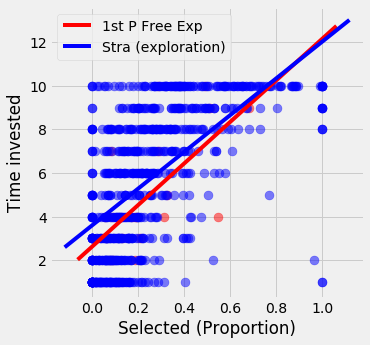

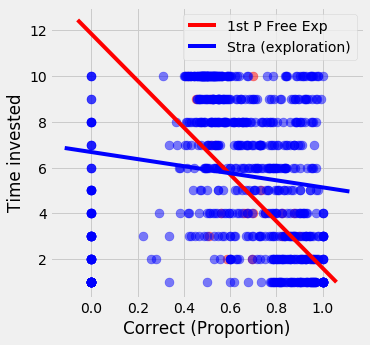

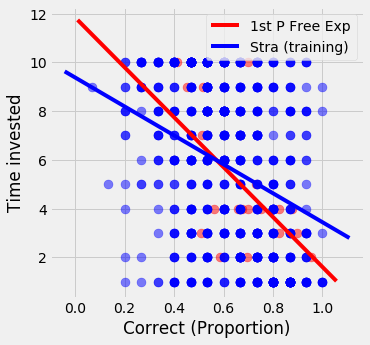

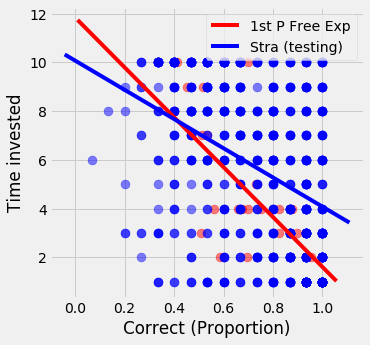

In [19]:
#axes = [uid, tkCplx, tkNSel, tkPSel, tkNCorr, tkPCorr, interest, complex, time, progress, rule, learn]
# %correct and %chosen
plotCombined(fpilot,spilot,'tkPSel','time','exploration')
plotCombined(fpilot,spilot,'tkPCorr','time','exploration')
plotCombined(fpilot,spilot,'tkPCorr','time','training')
plotCombined(fpilot,spilot,'tkPCorr','time','testing')

## Filtering non exploratory subjects

In [20]:
# Get uid of those that did not explore the four tasks
nexplid = np.unique(spilot[spilot[:,2]==0, 0])
#print(nexplid, np.shape(nexplid))

# Get rows with information related to those uids
#print(np.searchsorted(spilot[:,0], nexplid))
ranges = tuple(range(n*4,n*4+4) for n in nexplid.astype('int'))
#print(ranges)

# Remove rows
spilotMod = np.delete(spilot, ranges, axis=0)

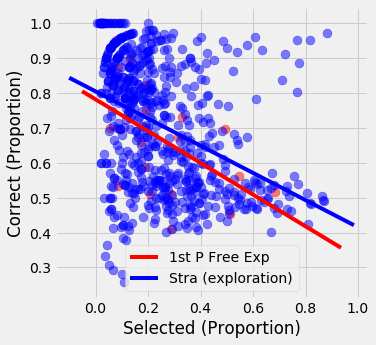

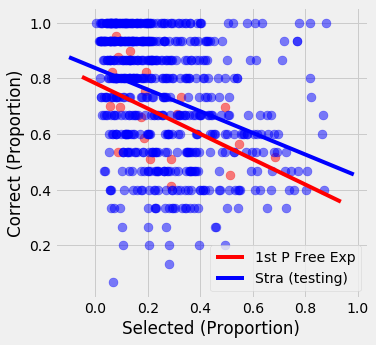

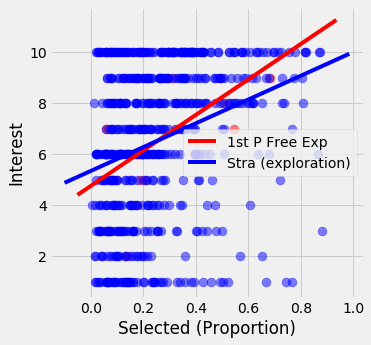

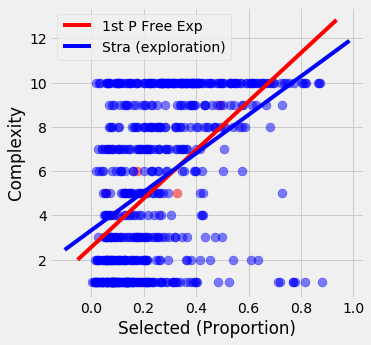

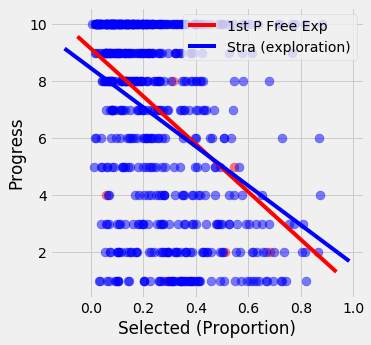

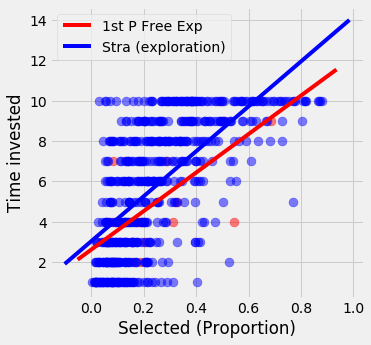

In [21]:
plotCombined(fpilot,spilotMod,'tkPSel','tkPCorr','exploration')
plotCombined(fpilot,spilotMod,'tkPSel','tkPCorr','testing')
plotCombined(fpilot,spilotMod,'tkPSel','interest','exploration')
plotCombined(fpilot,spilotMod,'tkPSel','complex','exploration')
plotCombined(fpilot,spilotMod,'tkPSel','progress','exploration')
plotCombined(fpilot,spilotMod,'tkPSel','time','exploration')

In [ ]:
spilo